# Handling Missing Values
Missing values might be the most undesired values in data science.We definitely do not want to have them.
1. Let�s start by creating a sample data frame and adding some missing values to it.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.DataFrame({
    "Date":pd.date_range(start="2021-10-01",periods=10,freq="D"),
    "Item":1014,
    "Measure_1":np.random.randint(1,10,size=10),
    "Measure_2":np.random.random(10).round(2),
    "Measure_3":np.random.random(10).round(2),
    "Measure_4":np.random.randn(10)
})

In [3]:
df

,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2021-10-01,1014,5,0.34,0.05,-1.272942
1,2021-10-02,1014,3,0.20,0.47,-0.428837
2,2021-10-03,1014,8,0.16,0.73,1.617946
3,2021-10-04,1014,5,0.57,0.36,0.028668
4,2021-10-05,1014,6,0.81,0.12,0.265760
5,2021-10-06,1014,4,0.64,0.78,0.172887
6,2021-10-07,1014,6,0.10,0.35,1.143431
7,2021-10-08,1014,1,0.60,0.59,0.457455
8,2021-10-09,1014,1,0.49,0.30,2.157731
9,2021-10-10,1014,1,0.88,0.40,-0.177404


In [75]:
#np.random.randint(1,10,size=10)
# Generate 10 random integers between 1 (inclusive) and 10 (exclusive)
#Generates an array of random floating-point numbers uniformly distributed between 0 (inclusive) and 1 (exclusive).
#10 random numbers from a standard normal distribution with mean 0 and standard deviation 1.
# # Example 2: Hourly frequency
# date_range_hourly = pd.date_range(start="2021-10-01", periods=10, freq="H")
# # Example 4: Monthly frequency (end of the month)
# date_range_monthly = pd.date_range(start="2021-01-01", periods=10, freq="M")
# print("\nMonthly Frequency (Month end):\n", date_range_monthly)

In [4]:
df

,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2021-10-01,1014,5,0.34,0.05,-1.272942
1,2021-10-02,1014,3,0.20,0.47,-0.428837
2,2021-10-03,1014,8,0.16,0.73,1.617946
3,2021-10-04,1014,5,0.57,0.36,0.028668
4,2021-10-05,1014,6,0.81,0.12,0.265760
5,2021-10-06,1014,4,0.64,0.78,0.172887
6,2021-10-07,1014,6,0.10,0.35,1.143431
7,2021-10-08,1014,1,0.60,0.59,0.457455
8,2021-10-09,1014,1,0.49,0.30,2.157731
9,2021-10-10,1014,1,0.88,0.40,-0.177404


find mean and standard deciation of measure_4


In [16]:
#Adding few missing values
df.loc[[2,9],"Item"]=np.nan
df.loc[[2,7,9],"Measure_1"]=np.nan
df.loc[[2,3],"Measure_2"]=np.nan
df.loc[[2],"Measure_3"]=np.nan
df.loc[:6,"Measure_4"]=np.nan

In [6]:
df

,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2021-10-01,1014.0,5.0,0.34,0.05,NaN
1,2021-10-02,1014.0,3.0,0.20,0.47,NaN
2,2021-10-03,NaN,NaN,NaN,NaN,NaN
3,2021-10-04,1014.0,5.0,NaN,0.36,NaN
4,2021-10-05,1014.0,6.0,0.81,0.12,NaN
5,2021-10-06,1014.0,4.0,0.64,0.78,NaN
6,2021-10-07,1014.0,6.0,0.10,0.35,NaN
7,2021-10-08,1014.0,NaN,0.60,0.59,0.457455
8,2021-10-09,1014.0,1.0,0.49,0.30,2.157731
9,2021-10-10,NaN,NaN,0.88,0.40,-0.177404


With Pandas, an integer type missing value representation (<NA>) was introduced so we can have missing values in integer columns as well. However, we need to explicitly declare the data type.

In [7]:
df=df.astype({
    "Item":pd.Int64Dtype(),
    "Measure_1":pd.Int64Dtype()
})

In [8]:
df

,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2021-10-01,1014,5,0.34,0.05,NaN
1,2021-10-02,1014,3,0.20,0.47,NaN
2,2021-10-03,<NA>,<NA>,NaN,NaN,NaN
3,2021-10-04,1014,5,NaN,0.36,NaN
4,2021-10-05,1014,6,0.81,0.12,NaN
5,2021-10-06,1014,4,0.64,0.78,NaN
6,2021-10-07,1014,6,0.10,0.35,NaN
7,2021-10-08,1014,<NA>,0.60,0.59,0.457455
8,2021-10-09,1014,1,0.49,0.30,2.157731
9,2021-10-10,<NA>,<NA>,0.88,0.40,-0.177404


# Method 1: Drop rows or columns that have a missing value

In [9]:
#One option is to drop the rows or columns that contain a missing value.
df.dropna()
#With the default parameter values, the dropna function drops the rows that contain any
#missing value.

,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
8,2021-10-09,1014,1,0.49,0.3,2.157731


In [10]:
#We can also choose to drop columns that have at least one missing value by using the
#axis parameter.
df.dropna(axis=1)

,Date
0,2021-10-01
1,2021-10-02
2,2021-10-03
3,2021-10-04
4,2021-10-05
5,2021-10-06
6,2021-10-07
7,2021-10-08
8,2021-10-09
9,2021-10-10


In [11]:
#Another situation is to have a column or row that is full of missing values.
#The dropna function can be used for this as well. We just need to change the value of
#how parameter.
df.dropna(how="all")

,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2021-10-01,1014,5,0.34,0.05,NaN
1,2021-10-02,1014,3,0.20,0.47,NaN
2,2021-10-03,<NA>,<NA>,NaN,NaN,NaN
3,2021-10-04,1014,5,NaN,0.36,NaN
4,2021-10-05,1014,6,0.81,0.12,NaN
5,2021-10-06,1014,4,0.64,0.78,NaN
6,2021-10-07,1014,6,0.10,0.35,NaN
7,2021-10-08,1014,<NA>,0.60,0.59,0.457455
8,2021-10-09,1014,1,0.49,0.30,2.157731
9,2021-10-10,<NA>,<NA>,0.88,0.40,-0.177404


In [12]:
#Drop rows or columns based on a threshold value
#For instance, �thresh=4� means that the rows that have at least 4 non-missing values will be kept. The other ones will be dropped.
df.dropna(thresh=4)

,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2021-10-01,1014,5,0.34,0.05,NaN
1,2021-10-02,1014,3,0.20,0.47,NaN
3,2021-10-04,1014,5,NaN,0.36,NaN
4,2021-10-05,1014,6,0.81,0.12,NaN
5,2021-10-06,1014,4,0.64,0.78,NaN
6,2021-10-07,1014,6,0.10,0.35,NaN
7,2021-10-08,1014,<NA>,0.60,0.59,0.457455
8,2021-10-09,1014,1,0.49,0.30,2.157731
9,2021-10-10,<NA>,<NA>,0.88,0.40,-0.177404


In [13]:
#Drop based on a particular subset of columns
#The subset parameter of the dropna function is used for this task. For instance,
#we can drop the rows that have a missing value in measure 1 or measure 2 columns as follows:
df.dropna(subset=["Measure_2","Measure_3"])

,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2021-10-01,1014,5,0.34,0.05,NaN
1,2021-10-02,1014,3,0.20,0.47,NaN
4,2021-10-05,1014,6,0.81,0.12,NaN
5,2021-10-06,1014,4,0.64,0.78,NaN
6,2021-10-07,1014,6,0.10,0.35,NaN
7,2021-10-08,1014,<NA>,0.60,0.59,0.457455
8,2021-10-09,1014,1,0.49,0.30,2.157731
9,2021-10-10,<NA>,<NA>,0.88,0.40,-0.177404


# Method 2: Fill with a constant value

In [14]:
#We can choose a constant value to be used as a replacement for the missing values.
values={"Item":1014,"Measure_1":0}
df.fillna(value=values)

,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2021-10-01,1014,5,0.34,0.05,NaN
1,2021-10-02,1014,3,0.20,0.47,NaN
2,2021-10-03,1014,0,NaN,NaN,NaN
3,2021-10-04,1014,5,NaN,0.36,NaN
4,2021-10-05,1014,6,0.81,0.12,NaN
5,2021-10-06,1014,4,0.64,0.78,NaN
6,2021-10-07,1014,6,0.10,0.35,NaN
7,2021-10-08,1014,0,0.60,0.59,0.457455
8,2021-10-09,1014,1,0.49,0.30,2.157731
9,2021-10-10,1014,0,0.88,0.40,-0.177404


# Method 3: Fill with an aggregated value

In [87]:
#Another option is to use an aggregated value such as mean, median, or mode.
df["Measure_2"].fillna(df["Measure_2"].mean())

0    0.60000
1    0.70000
2    0.63125
3    0.63125
4    0.98000
5    0.24000
6    0.90000
7    0.51000
8    0.83000
9    0.29000
Name: Measure_2, dtype: float64

In [17]:
df

,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2021-10-01,1014,5,0.34,0.05,NaN
1,2021-10-02,1014,3,0.20,0.47,NaN
2,2021-10-03,<NA>,<NA>,NaN,NaN,NaN
3,2021-10-04,1014,5,NaN,0.36,NaN
4,2021-10-05,1014,6,0.81,0.12,NaN
5,2021-10-06,1014,4,0.64,0.78,NaN
6,2021-10-07,1014,6,0.10,0.35,NaN
7,2021-10-08,1014,<NA>,0.60,0.59,0.457455
8,2021-10-09,1014,1,0.49,0.30,2.157731
9,2021-10-10,<NA>,<NA>,0.88,0.40,-0.177404


In [18]:
df["Measure_1"].fillna(df["Measure_1"].median())
# from sklearn.impute import SimpleImputer
# my_imputer=SimpleImputer(strategy='median')
# my_imputer.fit_transform(np.array(df['Measure_3']).reshape(-1,1))

0    5
1    3
2    5
3    5
4    6
5    4
6    6
7    5
8    1
9    5
Name: Measure_1, dtype: Int64

# Method 4: Replace with the previous or next value

In [21]:
#It is possible to replace the missing values in a column with the previous or next value
# in that column.
#This method might come in handy when working with time-series data.
#Consider you have a data frame that contains the daily temperature measurement
# and the temperate in one day is missing.
#The optimal solution would be to use the temperature in the next or previous day.
df.fillna(method="ffill")

C:\Users\acer\AppData\Local\Temp\ipykernel_20464\3767167587.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill")


,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2021-10-01,1014,5,0.34,0.05,NaN
1,2021-10-02,1014,3,0.20,0.47,NaN
2,2021-10-03,1014,3,0.20,0.47,NaN
3,2021-10-04,1014,5,0.20,0.36,NaN
4,2021-10-05,1014,6,0.81,0.12,NaN
5,2021-10-06,1014,4,0.64,0.78,NaN
6,2021-10-07,1014,6,0.10,0.35,NaN
7,2021-10-08,1014,6,0.60,0.59,0.457455
8,2021-10-09,1014,1,0.49,0.30,2.157731
9,2021-10-10,1014,1,0.88,0.40,-0.177404


In [20]:
#we can limit the number of missing values replaced with this method.
#If we set the limit parameter as 1, then a missing value can only be replaced with its next value.
#The second or third following value will not be used for replacement.
df.fillna(method="bfill",limit=1)

C:\Users\acer\AppData\Local\Temp\ipykernel_20464\2464338646.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill",limit=1)


,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2021-10-01,1014,5,0.34,0.05,NaN
1,2021-10-02,1014,3,0.20,0.47,NaN
2,2021-10-03,1014,5,NaN,0.36,NaN
3,2021-10-04,1014,5,0.81,0.36,NaN
4,2021-10-05,1014,6,0.81,0.12,NaN
5,2021-10-06,1014,4,0.64,0.78,NaN
6,2021-10-07,1014,6,0.10,0.35,0.457455
7,2021-10-08,1014,1,0.60,0.59,0.457455
8,2021-10-09,1014,1,0.49,0.30,2.157731
9,2021-10-10,<NA>,<NA>,0.88,0.40,-0.177404


# Method 5: Fill by using another dataframe

We can also pass another data frame to the fillna function. The values in the new data frame will be used to replace the missing values in the current data frame.

The values will be selected according to the row indices and column names. For instance, if there is a missing value in the second row in the item column, the value in the same location in the new data frame will be used.

In [22]:
#Defining a new dataframe
df1=pd.DataFrame({
    "Date":pd.date_range(start="2021-10-01",periods=10,freq="D"),
    "Item":1014,
    "Measure_1":np.random.randint(1,10,size=10),
    "Measure_2":np.random.random(10).round(2),
    "Measure_3":np.random.random(10).round(2),
    "Measure_4":np.random.randn(10)
})
df1

,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2021-10-01,1014,6,0.82,0.20,0.766012
1,2021-10-02,1014,7,0.14,0.22,0.191512
2,2021-10-03,1014,9,0.07,0.37,-0.664863
3,2021-10-04,1014,9,0.14,0.57,-0.761962
4,2021-10-05,1014,8,0.65,0.99,-0.689390
5,2021-10-06,1014,6,0.42,0.73,-0.620269
6,2021-10-07,1014,9,0.75,0.24,0.633046
7,2021-10-08,1014,3,0.97,0.41,-1.047194
8,2021-10-09,1014,5,0.67,0.31,0.185392
9,2021-10-10,1014,5,0.16,0.30,0.780732


In [23]:
#Using df1 to fill missing values in df
df.fillna(df1)

,Date,Item,Measure_1,Measure_2,Measure_3,Measure_4
0,2021-10-01,1014,5,0.34,0.05,0.766012
1,2021-10-02,1014,3,0.20,0.47,0.191512
2,2021-10-03,1014,9,0.07,0.37,-0.664863
3,2021-10-04,1014,5,0.14,0.36,-0.761962
4,2021-10-05,1014,6,0.81,0.12,-0.689390
5,2021-10-06,1014,4,0.64,0.78,-0.620269
6,2021-10-07,1014,6,0.10,0.35,0.633046
7,2021-10-08,1014,3,0.60,0.59,0.457455
8,2021-10-09,1014,1,0.49,0.30,2.157731
9,2021-10-10,1014,5,0.88,0.40,-0.177404


# Method 6: Using KNN to impute missing values

In [25]:
df2=pd.read_csv('train.csv')

In [26]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
df2.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
df2.drop("Name",axis=1,inplace=True)
df2.drop("Ticket",axis=1,inplace=True)
df2.drop("PassengerId",axis=1,inplace=True)
df2.drop("Cabin",axis=1,inplace=True)
df2.drop("Embarked",axis=1,inplace=True)

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['Sex'] = le.fit_transform(df2['Sex'])

In [30]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,NaN,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


In [31]:
df2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [32]:
from sklearn.impute import KNNImputer
K=KNNImputer(n_neighbors=5)
df3=K.fit_transform(df2)
df2_imputed = pd.DataFrame(K.fit_transform(df2), columns=df2.columns)

In [33]:
df2_imputed.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

# Detect and Remove the Outliers

In [35]:
# Importing
import sklearn
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path='./online_shoppers_intention.csv'

# Create the dataframe
df = pd.read_csv(file_path)
print(df.shape)
df.head(10)


(12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


# Method 1: Using Visualization techniques
Outliers can be detected using visualization techniques like boxplot and scatter plots

a. Using BoxPlot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

{'whiskers': [<matplotlib.lines.Line2D at 0x191c3e300d0>,
 'caps': [<matplotlib.lines.Line2D at 0x191c3e319d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x191c3e23390>],
 'medians': [<matplotlib.lines.Line2D at 0x191c3e33150>],
 'fliers': [<matplotlib.lines.Line2D at 0x191c3e33c10>],
 'means': []}

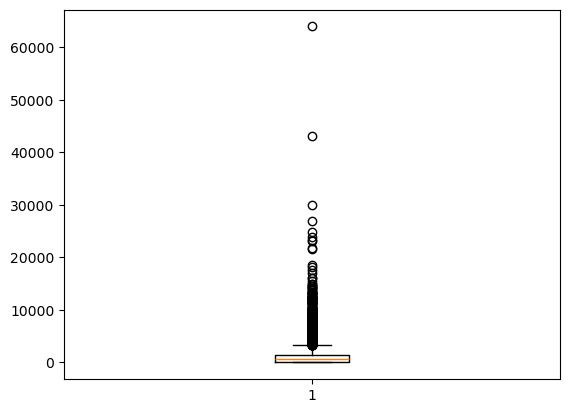

In [36]:
import seaborn as sns
plt.boxplot(df['ProductRelated_Duration'])

In [37]:
# Position of the Outlier
print(np.where(df['ProductRelated_Duration']>30000))

(array([5152, 8071], dtype=int64),)


b. ScatterPlot: It is used when you have paired numerical data, or when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

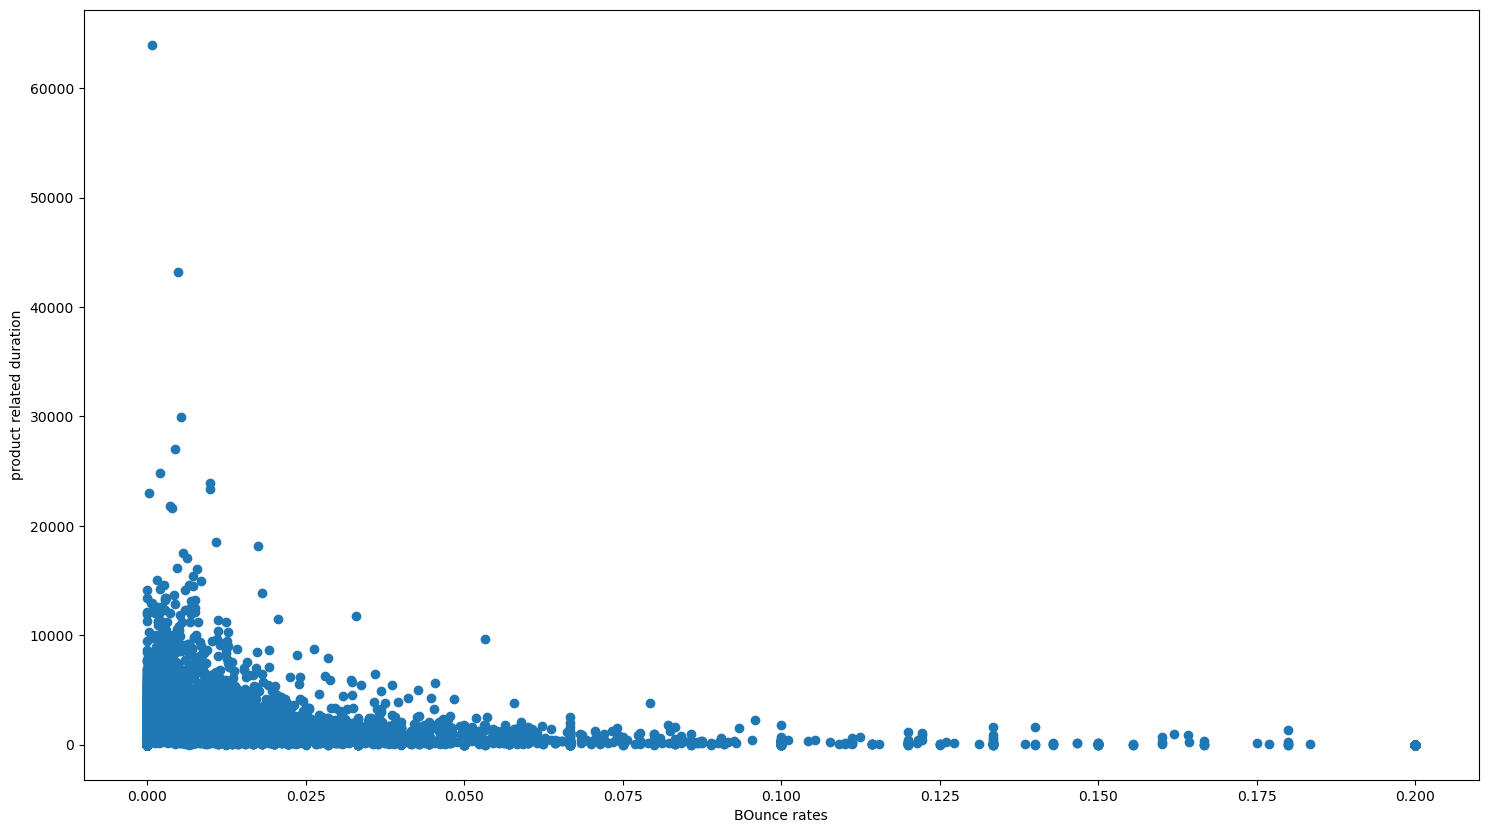

In [38]:
#To plot the scatter plot one requires two variables that are somehow related to each other.
#So here, �Proportion of non-retail business acres per town� and
#�Full-value property-tax rate per $10,000� are used
#whose column names are �INDUS� and �TAX� respectively.
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df['BounceRates'], df['ProductRelated_Duration'])

# x-axis label
ax.set_xlabel('BOunce rates')

# y-axis label
ax.set_ylabel('product related duration')
plt.show()

Looking at the graph can summarize that most of the data points are in the bottom left corner of the graph but there are few points that are exactly;y opposite that is the top right corner of the graph. Those points in the top right corner can be regarded as Outliers.

Using approximation can say all those data points that are x>20 and y>600 are outliers.

In [39]:
# Position of the Outlier
print(np.where((df['BounceRates']>0.18)))
 #print(np.where((df['ProductRelated_Duration']>30000)))

(array([    0,     2,     6,     7,    16,    21,    24,    49,    50,
          55,    56,    64,    67,    69,    70,    78,    79,    84,
          85,    91,   111,   112,   125,   132,   140,   143,   151,
         156,   158,   159,   173,   178,   181,   182,   190,   252,
         261,   271,   286,   293,   298,   302,   330,   341,   344,
         356,   359,   383,   398,   418,   421,   426,   429,   456,
         458,   468,   479,   483,   512,   515,   532,   540,   554,
         577,   585,   589,   591,   638,   658,   659,   670,   720,
         724,   727,   743,   763,   774,   804,   805,   822,   831,
         870,   872,   889,   897,   922,   929,   933,   942,   945,
         947,   956,   974,   993,  1004,  1022,  1023,  1034,  1047,
        1059,  1118,  1119,  1123,  1133,  1142,  1143,  1154,  1169,
        1170,  1172,  1176,  1180,  1213,  1214,  1236,  1265,  1285,
        1291,  1325,  1332,  1356,  1363,  1366,  1381,  1389,  1390,
        1394,  1396

# Method 2: Using Z-score
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.

In [40]:
# Z score
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df['ProductRelated_Duration']))
print(z)

0        0.624348
1        0.590903
2        0.624348
3        0.622954
4        0.296430
           ...   
12325    0.307822
12326    0.380957
12327    0.528063
12328    0.443536
12329    0.613243
Name: ProductRelated_Duration, Length: 12330, dtype: float64


Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

In [41]:
#threshold = 3

# Position of the outlier
print(np.where(z > 3))

(array([   66,   510,   799,   979,  1037,  1146,  1207,  1556,  1846,
        1855,  2133,  2414,  2415,  2560,  2564,  2590,  2599,  2645,
        2824,  2890,  2939,  2969,  3561,  3809,  4226,  4253,  4326,
        4629,  4674,  4933,  5045,  5152,  5425,  5639,  5679,  5755,
        5807,  5891,  5916,  5971,  5990,  6046,  6066,  6086,  6098,
        6103,  6165,  6170,  6248,  6278,  6322,  6335,  6337,  6422,
        6474,  6488,  6519,  6550,  6603,  6674,  6684,  6733,  6762,
        6770,  6787,  6797,  6820,  6862,  6941,  6992,  6998,  7290,
        7292,  7321,  7432,  7589,  7662,  7679,  7828,  7900,  7925,
        8071,  8093,  8094,  8125,  8230,  8238,  8278,  8308,  8355,
        8415,  8438,  8485,  8548,  8557,  8602,  8612,  8618,  8630,
        8655,  8725,  8764,  8784,  8830,  8872,  8877,  8878,  8883,
        8947,  8972,  9005,  9035,  9122,  9156,  9195,  9238,  9248,
        9298,  9371,  9400,  9483,  9484,  9539,  9576,  9688,  9704,
        9705,  9709

# Method 3: Inter Quartile Range
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field.

In [42]:
# IQR
import numpy as np
Q1 = np.percentile(df['ProductRelated_Duration'], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(df['ProductRelated_Duration'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 + 1.5*IQR

lower = Q1 - 1.5*IQR

In [43]:
# Upper bound
upper = np.where(df['ProductRelated_Duration'] >= (Q3+1.5*IQR))
print(upper)
# Lower bound
lower = np.where(df['ProductRelated_Duration'] <= (Q1-1.5*IQR))
print(lower)

(array([   40,    66,   109,   195,   251,   265,   277,   334,   367,
         424,   470,   477,   499,   510,   575,   611,   619,   722,
         739,   769,   799,   825,   853,   884,   912,   952,   968,
         979,  1036,  1037,  1102,  1117,  1146,  1182,  1185,  1196,
        1207,  1233,  1324,  1339,  1499,  1519,  1554,  1556,  1564,
        1572,  1598,  1732,  1770,  1793,  1833,  1846,  1855,  1882,
        1958,  1973,  1986,  2011,  2040,  2045,  2071,  2073,  2093,
        2096,  2103,  2109,  2133,  2143,  2190,  2203,  2204,  2217,
        2219,  2256,  2262,  2301,  2372,  2387,  2397,  2414,  2415,
        2428,  2457,  2464,  2525,  2535,  2560,  2564,  2568,  2581,
        2590,  2595,  2599,  2633,  2645,  2744,  2746,  2824,  2825,
        2890,  2902,  2921,  2929,  2939,  2941,  2969,  2970,  2996,
        3029,  3091,  3114,  3127,  3156,  3178,  3179,  3185,  3228,
        3236,  3253,  3263,  3308,  3313,  3347,  3369,  3397,  3405,
        3439,  3453

In [44]:
df['ProductRelated_Duration'] >= (Q3+1.5*IQR)

0        False
1        False
2        False
3        False
4        False
         ...  
12325    False
12326    False
12327    False
12328    False
12329    False
Name: ProductRelated_Duration, Length: 12330, dtype: bool

In [ ]:
upper

array([   40,    66,   109,   195,   251,   265,   277,   334,   367,
         424,   470,   477,   499,   510,   575,   611,   619,   722,
         739,   769,   799,   825,   853,   884,   912,   952,   968,
         979,  1036,  1037,  1102,  1117,  1146,  1182,  1185,  1196,
        1207,  1233,  1324,  1339,  1499,  1519,  1554,  1556,  1564,
        1572,  1598,  1732,  1770,  1793,  1833,  1846,  1855,  1882,
        1958,  1973,  1986,  2011,  2040,  2045,  2071,  2073,  2093,
        2096,  2103,  2109,  2133,  2143,  2190,  2203,  2204,  2217,
        2219,  2256,  2262,  2301,  2372,  2387,  2397,  2414,  2415,
        2428,  2457,  2464,  2525,  2535,  2560,  2564,  2568,  2581,
        2590,  2595,  2599,  2633,  2645,  2744,  2746,  2824,  2825,
        2890,  2902,  2921,  2929,  2939,  2941,  2969,  2970,  2996,
        3029,  3091,  3114,  3127,  3156,  3178,  3179,  3185,  3228,
        3236,  3253,  3263,  3308,  3313,  3347,  3369,  3397,  3405,
        3439,  3453,

In [47]:
#Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

KeyError: '[40, 66, 109, 195, 251, 265, 277, 334, 367, 424, 470, 477, 499, 510, 575, 611, 619, 722, 739, 769, 799, 825, 853, 884, 912, 952, 968, 979, 1036, 1037, 1102, 1117, 1146, 1182, 1185, 1196, 1207, 1233, 1324, 1339, 1499, 1519, 1554, 1556, 1564, 1572, 1598, 1732, 1770, 1793, 1833, 1846, 1855, 1882, 1958, 1973, 1986, 2011, 2040, 2045, 2071, 2073, 2093, 2096, 2103, 2109, 2133, 2143, 2190, 2203, 2204, 2217, 2219, 2256, 2262, 2301, 2372, 2387, 2397, 2414, 2415, 2428, 2457, 2464, 2525, 2535, 2560, 2564, 2568, 2581, 2590, 2595, 2599, 2633, 2645, 2744, 2746, 2824, 2825, 2890, 2902, 2921, 2929, 2939, 2941, 2969, 2970, 2996, 3029, 3091, 3114, 3127, 3156, 3178, 3179, 3185, 3228, 3236, 3253, 3263, 3308, 3313, 3347, 3369, 3397, 3405, 3439, 3453, 3503, 3517, 3524, 3561, 3600, 3602, 3636, 3639, 3689, 3697, 3713, 3719, 3724, 3725, 3749, 3759, 3765, 3806, 3807, 3809, 3830, 3874, 3912, 3930, 3936, 3961, 4000, 4027, 4030, 4061, 4092, 4108, 4114, 4115, 4150, 4162, 4173, 4193, 4211, 4226, 4229, 4245, 4253, 4326, 4346, 4353, 4359, 4372, 4375, 4381, 4384, 4397, 4398, 4485, 4514, 4516, 4521, 4540, 4550, 4601, 4615, 4616, 4629, 4637, 4664, 4674, 4681, 4700, 4720, 4742, 4749, 4788, 4793, 4814, 4820, 4828, 4869, 4933, 4937, 4949, 4953, 4974, 5028, 5045, 5111, 5112, 5152, 5153, 5259, 5275, 5316, 5333, 5345, 5368, 5410, 5425, 5468, 5473, 5500, 5517, 5555, 5561, 5569, 5583, 5596, 5597, 5600, 5617, 5637, 5638, 5639, 5679, 5690, 5730, 5741, 5751, 5755, 5773, 5776, 5780, 5784, 5788, 5807, 5836, 5845, 5879, 5891, 5893, 5895, 5916, 5962, 5971, 5990, 6011, 6046, 6053, 6061, 6066, 6072, 6074, 6086, 6098, 6103, 6144, 6165, 6169, 6170, 6180, 6194, 6199, 6229, 6241, 6248, 6271, 6278, 6296, 6301, 6306, 6311, 6322, 6335, 6337, 6362, 6389, 6401, 6403, 6421, 6422, 6443, 6444, 6452, 6467, 6473, 6474, 6488, 6490, 6494, 6511, 6519, 6545, 6550, 6557, 6559, 6574, 6592, 6596, 6601, 6603, 6616, 6674, 6680, 6684, 6689, 6705, 6729, 6733, 6741, 6748, 6752, 6753, 6757, 6762, 6770, 6787, 6793, 6797, 6819, 6820, 6831, 6836, 6862, 6868, 6885, 6898, 6918, 6930, 6934, 6936, 6941, 6948, 6961, 6992, 6997, 6998, 7039, 7063, 7073, 7084, 7094, 7108, 7128, 7177, 7182, 7206, 7236, 7290, 7292, 7304, 7315, 7321, 7358, 7370, 7386, 7387, 7414, 7424, 7432, 7474, 7523, 7574, 7589, 7606, 7611, 7616, 7644, 7650, 7654, 7662, 7679, 7696, 7718, 7731, 7746, 7762, 7763, 7768, 7770, 7780, 7798, 7800, 7807, 7808, 7828, 7857, 7893, 7900, 7909, 7925, 7930, 7938, 7959, 7991, 8008, 8009, 8017, 8030, 8039, 8050, 8066, 8071, 8076, 8081, 8088, 8093, 8094, 8116, 8125, 8131, 8137, 8173, 8188, 8197, 8203, 8228, 8230, 8234, 8238, 8248, 8260, 8269, 8270, 8274, 8277, 8278, 8279, 8281, 8284, 8303, 8308, 8330, 8332, 8337, 8348, 8349, 8355, 8371, 8377, 8392, 8406, 8412, 8415, 8435, 8438, 8441, 8465, 8466, 8479, 8485, 8486, 8499, 8514, 8521, 8527, 8535, 8548, 8557, 8560, 8570, 8582, 8594, 8600, 8602, 8607, 8608, 8612, 8618, 8623, 8629, 8630, 8655, 8660, 8664, 8673, 8677, 8691, 8704, 8719, 8725, 8726, 8758, 8763, 8764, 8772, 8784, 8785, 8787, 8807, 8815, 8816, 8818, 8826, 8830, 8831, 8833, 8846, 8872, 8874, 8877, 8878, 8883, 8885, 8907, 8927, 8929, 8947, 8952, 8961, 8965, 8972, 8975, 8976, 8997, 9003, 9005, 9011, 9018, 9019, 9028, 9035, 9044, 9045, 9052, 9058, 9059, 9070, 9082, 9104, 9111, 9122, 9125, 9128, 9150, 9156, 9160, 9164, 9168, 9181, 9182, 9195, 9196, 9203, 9213, 9223, 9233, 9238, 9245, 9248, 9249, 9253, 9255, 9263, 9268, 9291, 9298, 9317, 9334, 9340, 9355, 9368, 9371, 9372, 9378, 9386, 9387, 9398, 9400, 9402, 9412, 9446, 9448, 9455, 9457, 9467, 9475, 9476, 9483, 9484, 9486, 9490, 9498, 9527, 9537, 9539, 9541, 9545, 9548, 9558, 9560, 9564, 9572, 9576, 9594, 9595, 9604, 9607, 9627, 9635, 9643, 9664, 9688, 9689, 9704, 9705, 9709, 9714, 9736, 9742, 9748, 9755, 9773, 9780, 9793, 9803, 9806, 9821, 9837, 9845, 9846, 9855, 9859, 9860, 9873, 9875, 9876, 9880, 9894, 9901, 9904, 9913, 9918, 9922, 9930, 9935, 9939, 9951, 9956, 9958, 9969, 9971, 9976, 9982, 9998, 10004, 10014, 10031, 10036, 10044, 10046, 10058, 10066, 10072, 10073, 10079, 10082, 10089, 10091, 10102, 10105, 10135, 10153, 10158, 10159, 10168, 10170, 10172, 10176, 10195, 10198, 10201, 10202, 10205, 10206, 10208, 10225, 10228, 10238, 10244, 10263, 10280, 10284, 10294, 10296, 10297, 10301, 10302, 10313, 10318, 10329, 10339, 10340, 10347, 10350, 10351, 10362, 10363, 10367, 10372, 10381, 10383, 10401, 10402, 10405, 10420, 10449, 10459, 10463, 10477, 10481, 10491, 10499, 10515, 10540, 10571, 10587, 10606, 10610, 10611, 10623, 10635, 10640, 10641, 10644, 10654, 10655, 10668, 10674, 10682, 10692, 10694, 10712, 10715, 10719, 10720, 10732, 10753, 10762, 10774, 10778, 10787, 10815, 10816, 10819, 10824, 10827, 10833, 10834, 10835, 10837, 10863, 10869, 10875, 10885, 10894, 10908, 10912, 10919, 10924, 10927, 10930, 10937, 10973, 10987, 10995, 11009, 11013, 11016, 11052, 11055, 11056, 11065, 11069, 11071, 11087, 11094, 11096, 11099, 11103, 11113, 11116, 11124, 11130, 11137, 11141, 11172, 11182, 11184, 11189, 11199, 11200, 11201, 11206, 11214, 11215, 11218, 11219, 11226, 11227, 11233, 11235, 11237, 11249, 11250, 11255, 11256, 11258, 11295, 11300, 11301, 11311, 11316, 11318, 11332, 11335, 11344, 11346, 11371, 11375, 11392, 11394, 11400, 11406, 11407, 11408, 11417, 11434, 11447, 11459, 11460, 11477, 11484, 11505, 11511, 11512, 11513, 11515, 11517, 11518, 11519, 11526, 11535, 11537, 11548, 11549, 11555, 11561, 11573, 11574, 11586, 11591, 11596, 11601, 11602, 11651, 11669, 11693, 11695, 11701, 11712, 11713, 11722, 11735, 11736, 11737, 11743, 11750, 11755, 11773, 11797, 11804, 11822, 11824, 11826, 11828, 11829, 11833, 11845, 11850, 11851, 11852, 11853, 11854, 11855, 11858, 11866, 11871, 11888, 11905, 11907, 11917, 11922, 11936, 11949, 11965, 11973, 11977, 11983, 11986, 11988, 11991, 11994, 12019, 12027, 12067, 12069, 12089, 12095, 12096, 12102, 12106, 12122, 12129, 12139, 12141, 12143, 12148, 12152, 12161, 12171, 12172, 12178, 12179, 12188, 12190, 12191, 12195, 12207, 12216, 12221, 12224, 12237, 12244, 12250, 12260, 12261, 12262, 12265, 12278, 12282, 12285, 12287, 12308, 12311, 12312] not found in axis'

In [48]:
#ufiris- dataset that is labeled and contain 4 features crresponding to iris flower- pet al length, petal width, sepal length, sepal width
# one output label- speciesf
from sklearn.datasets import load_iris
iris=load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [49]:
X=iris.data
Y=iris.target

In [55]:
df=pd.DataFrame(data=X,columns=['sepal_length','sepal_width','petal_length','petal_width'])

In [51]:
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [52]:
df['species']=Y
print(df)

     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


In [53]:
!pip install missingno


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

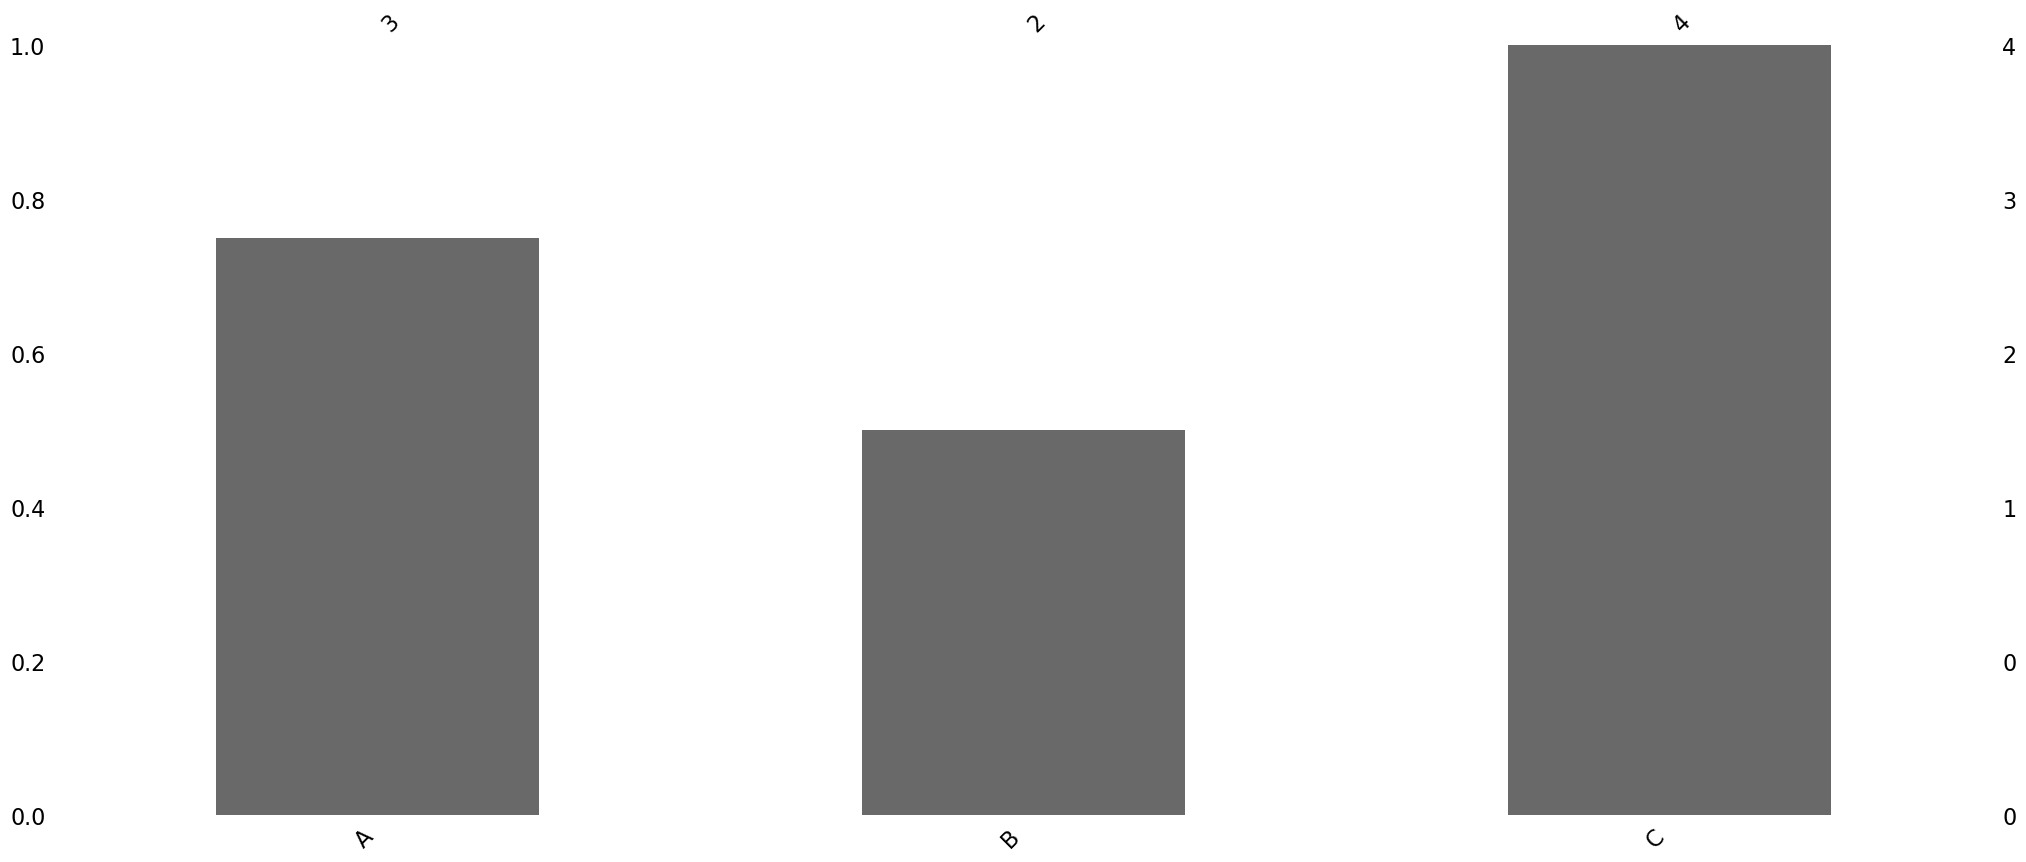

In [54]:
import missingno as msn
# Example DataFrame with some missing values
data = {'A': [1, 2, None, 4],
        'B': [5, None, None, 8],
        'C': [9, 10, 11, 12]}
df = pd.DataFrame(data)

# Visualize missing data
msn.bar(df)

<Axes: >

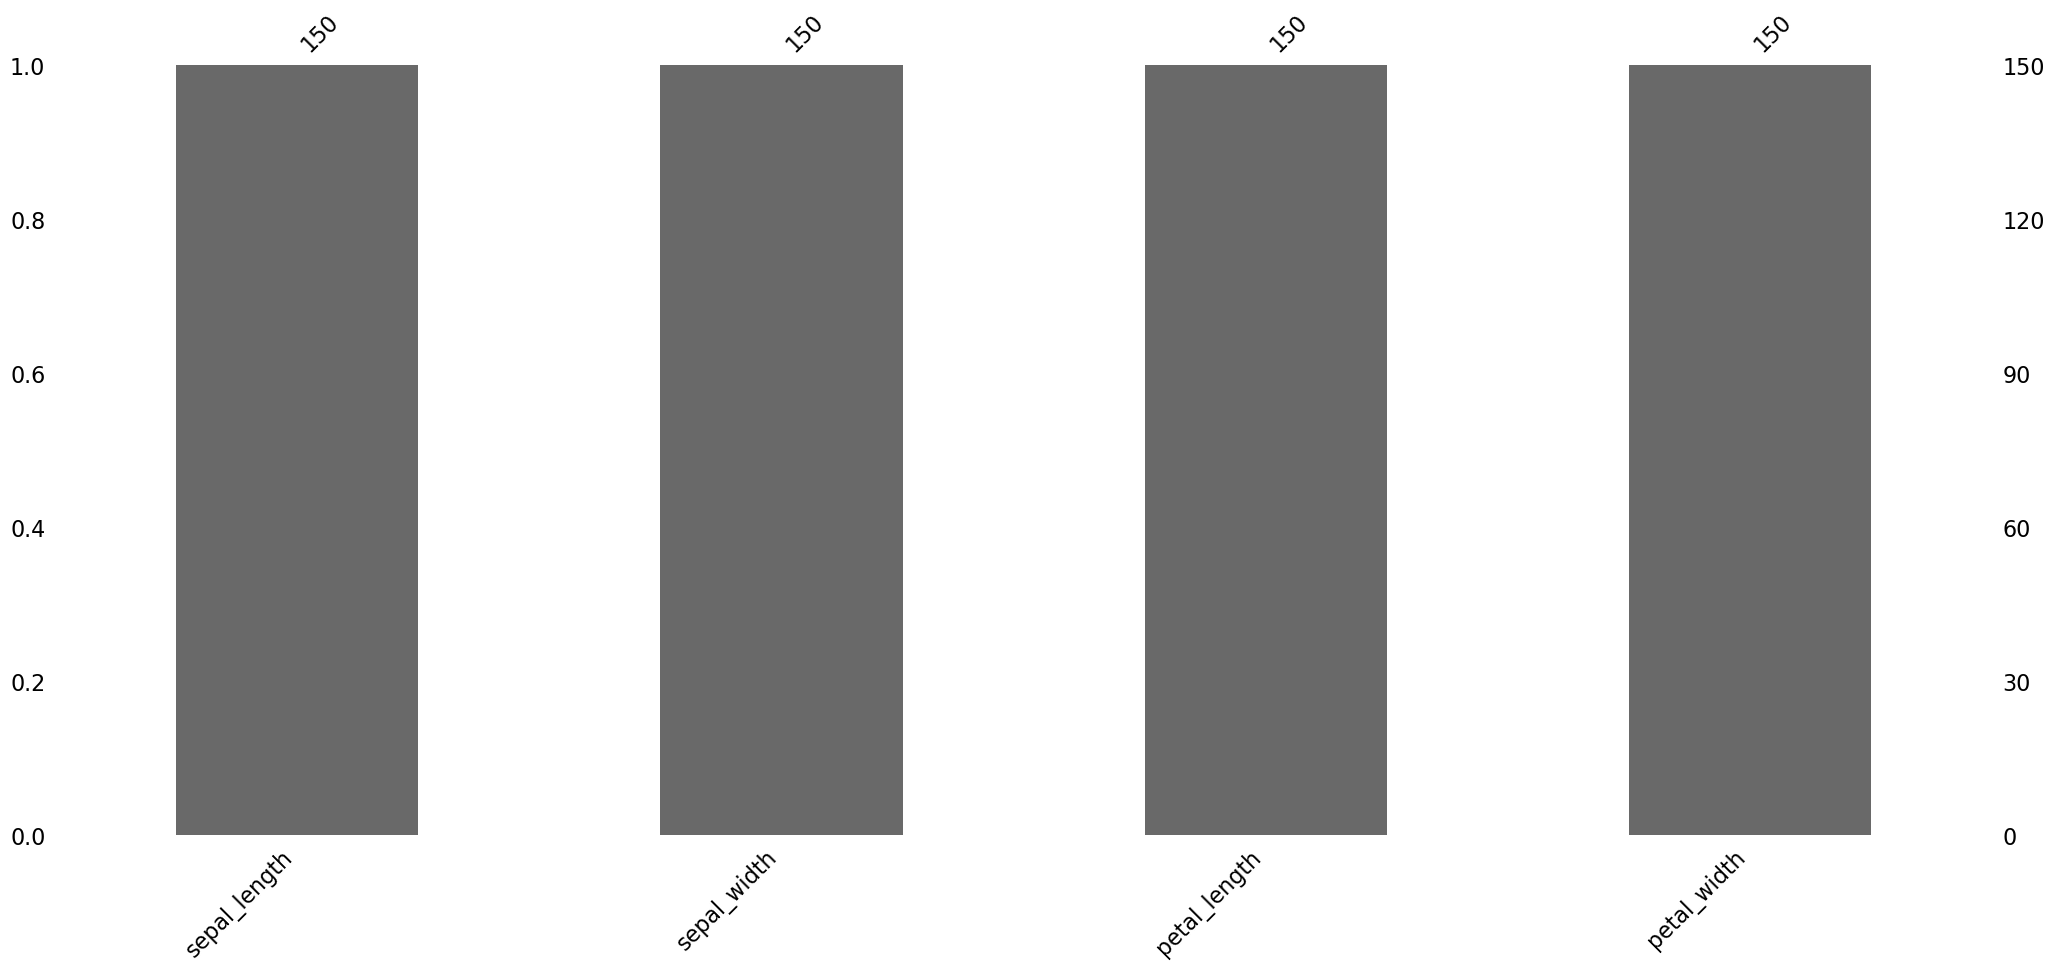

In [56]:
#Step2: Pre-processing
import missingno as msn
msn.bar(df)

<Axes: xlabel='count'>

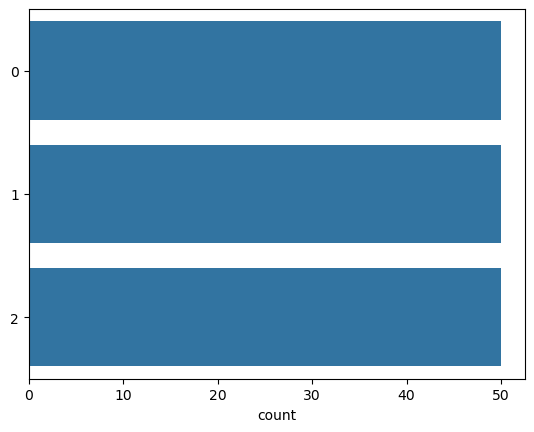

In [57]:
import seaborn as sns
sns.countplot(y=Y,data=df)

<Axes: >

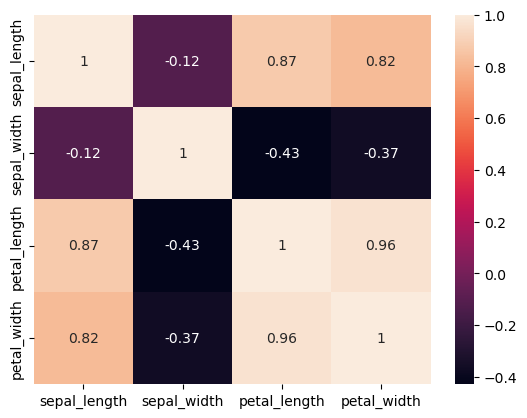

In [58]:
sns.heatmap(df.iloc[:,:4].corr(),annot=True)

# Assignment Questions

## Missing Data Handling:
Load a dataset with some missing values. Try three different methods for handling missing data:

Dropping rows/columns
Replacing with mean/median
Using KNNImputer or IterativeImputer
Compare the results.

## Scaling Techniques:
Apply Min-Max Scaling and Standard Scaling on the same dataset. Plot the distributions before and after scaling. Which scaling technique is more appropriate for features with outliers?

## Label Encoding vs One-Hot Encoding:
Take a categorical feature (e.g., "city" with values Delhi, Mumbai, Chennai). Encode it using both LabelEncoder and OneHotEncoder. Discuss when each should be used.

## Custom Function for Normalization:
Write a function to manually normalize a feature (0–1 range). Compare its output with MinMaxScaler from sklearn.

## Imputation with Domain Knowledge:
Suppose a "Salary" column has missing values. Instead of mean/median, fill them based on the "Education Level" column (hint: groupby + fillna). Show the steps.

## Detecting Outliers:
Implement Z-score method to detect outliers in a numeric feature. Compare it with the IQR method for the same feature.

## Feature Engineering:
Create a new feature by combining two existing features in the dataset (e.g., BMI = weight / height²). Normalize and scale the new feature.

# Suitable Datasets for Each Question

## Missing Data Handling

Dataset: Titanic dataset (seaborn.load_dataset("titanic")) → has many missing values (age, deck, embarked).

## Scaling Techniques

Dataset: Boston Housing (sklearn.datasets.fetch_california_housing) → has numerical features with different scales.

## Label Encoding vs One-Hot Encoding

Dataset: Titanic dataset (use "sex" or "embarked" column).

## Custom Function for Normalization

Dataset: Iris dataset (sklearn.datasets.load_iris) → numerical features like petal/sepal length.

## Imputation with Domain Knowledge

Dataset: Titanic dataset → impute "age" based on "class" or "sex".

## Detecting Outliers

Dataset: Boston Housing (or California Housing) → "house value" column has natural outliers.

## Feature Engineering

Dataset: Titanic → create "FamilySize" = SibSp + Parch + 1.

Or Iris → create "PetalRatio" = PetalLength / PetalWidth.

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

titanic = sns.load_dataset("titanic")

print("Original missing values per column:")
print(titanic.isnull().sum())

drop_rows = titanic.dropna()
print("\nAfter dropping rows with missing values:")
print(drop_rows.isnull().sum())
print(f"Shape: {drop_rows.shape}")


fill_mean_median = titanic.copy()
numeric_cols = fill_mean_median.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    fill_mean_median[col].fillna(fill_mean_median[col].mean(), inplace=True)


categorical_cols = fill_mean_median.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    fill_mean_median[col].fillna(fill_mean_median[col].mode()[0], inplace=True)

print("\nAfter filling missing values with mean/mode:")
print(fill_mean_median.isnull().sum())

knn_imputer = KNNImputer(n_neighbors=5)
titanic_num = titanic[numeric_cols]

titanic_num_imputed = pd.DataFrame(knn_imputer.fit_transform(titanic_num), columns=numeric_cols)

print("\nAfter KNN Imputation on numeric columns:")
print(titanic_num_imputed.isnull().sum())




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

data = fetch_california_housing(as_frame=True)
df = data.frame

features = df.columns[:-1]  

plt.figure(figsize=(15, 8))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f"Before Scaling: {col}")
plt.tight_layout()
plt.show()

minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[features] = minmax_scaler.fit_transform(df[features])

plt.figure(figsize=(15, 8))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_minmax[col], kde=True, color='green')
    plt.title(f"After Min-Max Scaling: {col}")
plt.tight_layout()
plt.show()

standard_scaler = StandardScaler()
df_standard = df.copy()
df_standard[features] = standard_scaler.fit_transform(df[features])

plt.figure(figsize=(15, 8))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_standard[col], kde=True, color='red')
    plt.title(f"After Standard Scaling: {col}")
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

titanic = sns.load_dataset('titanic')

cat_feature = titanic[['embarked']].dropna()  

print("Original feature sample:")
print(cat_feature['embarked'].value_counts())

le = LabelEncoder()
cat_feature['embarked_label_enc'] = le.fit_transform(cat_feature['embarked'])

print("\nLabel Encoded values:")
print(cat_feature[['embarked', 'embarked_label_enc']].head(10))

one_hot = pd.get_dummies(cat_feature['embarked'], prefix='embarked')

print("\nOne-Hot Encoded dataframe sample:")
print(one_hot.head(10))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

def normalize_manual(series):
    return (series - series.min()) / (series.max() - series.min())

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

print("Original data sample:")
print(df.head())

df['sepal length normalized manual'] = normalize_manual(df['sepal length (cm)'])

scaler = MinMaxScaler()
df['sepal length normalized sklearn'] = scaler.fit_transform(df[['sepal length (cm)']])

print("\nComparison of normalization outputs:")
print(df[['sepal length (cm)', 'sepal length normalized manual', 'sepal length normalized sklearn']].head())


In [ ]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset("titanic")

print("Missing values before imputation:")
print(titanic['age'].isnull().sum())

mean_age_by_class = titanic.groupby('class')['age'].mean()
print("\nMean age by class:")
print(mean_age_by_class)

def fill_age(row):
    if pd.isnull(row['age']):
        return mean_age_by_class[row['class']]
    else:
        return row['age']

titanic['age_filled'] = titanic.apply(fill_age, axis=1)

print("\nMissing values after imputation:")
print(titanic['age_filled'].isnull().sum())

print("\nSample of filled ages:")
print(titanic.loc[titanic['age'].isnull(), ['class', 'age', 'age_filled']].head())


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
df = data.frame

feature = 'MedHouseVal'

mean_val = df[feature].mean()
std_val = df[feature].std()
df['z_score'] = (df[feature] - mean_val) / std_val

z_threshold = 3
df['outlier_z'] = df['z_score'].abs() > z_threshold

Q1 = df[feature].quantile(0.25)
Q3 = df[feature].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['outlier_iqr'] = (df[feature] < lower_bound) | (df[feature] > upper_bound)

print(f"Total samples: {len(df)}")
print(f"Outliers detected by Z-score method: {df['outlier_z'].sum()}")
print(f"Outliers detected by IQR method: {df['outlier_iqr'].sum()}")

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.title('Z-score Outliers')
plt.boxplot(df.loc[~df['outlier_z'], feature], positions=[1], widths=0.6)
plt.boxplot(df.loc[df['outlier_z'], feature], positions=[2], widths=0.6)
plt.xticks([1, 2], ['Normal', 'Outliers'])
plt.ylabel(feature)

plt.subplot(1, 2, 2)
plt.title('IQR Outliers')
plt.boxplot(df.loc[~df['outlier_iqr'], feature], positions=[1], widths=0.6)
plt.boxplot(df.loc[df['outlier_iqr'], feature], positions=[2], widths=0.6)
plt.xticks([1, 2], ['Normal', 'Outliers'])

plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

titanic = sns.load_dataset('titanic')

titanic['FamilySize'] = titanic['sibsp'] + titanic['parch'] + 1

print("Sample FamilySize values before scaling:")
print(titanic['FamilySize'].head())

scaler = MinMaxScaler()
titanic['FamilySize_scaled'] = scaler.fit_transform(titanic[['FamilySize']])

print("\nSample FamilySize values after Min-Max scaling:")
print(titanic[['FamilySize', 'FamilySize_scaled']].head())
